In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


In [4]:
df = pd.read_csv("../data/processed/processed_data_2024-01-11_10-35-21.csv")

X = df.drop("Response", axis=1)
y = df["Response"]

In [6]:
row_to_check = X.iloc[0]
row_transformed = pd.get_dummies(row_to_check)
row_transformed

,False,True,20,60,Aflibercept,M,Not Hispanic or Latino,Type 2,White
Gender,False,False,False,False,False,True,False,False,False
AgeAsOfEnrollDt,False,False,False,True,False,False,False,False,False
Ethnicity,False,False,False,False,False,False,True,False,False
Race,False,False,False,False,False,False,False,False,True
DiabAge,False,False,True,False,False,False,False,False,False
DiabetesType,False,False,False,False,False,False,False,True,False
InsulinUsed,False,True,False,False,False,False,False,False,False
InsTrtAge,False,False,True,False,False,False,False,False,False
PtCurrMed,False,True,False,False,False,False,False,False,False
PreExistMedCond,False,True,False,False,False,False,False,False,False


In [7]:
pd.get_dummies(df)

,AgeAsOfEnrollDt,DiabAge,InsulinUsed,InsTrtAge,PtCurrMed,PreExistMedCond,Response,DMETrtHx,DMETrtFocalLasHx,DMETrtIVTHx,...,Race_More than one race,Race_Native Hawaiian/Other Pacific Islander,Race_Unknown/not reported,Race_White,DiabetesType_Type 1,DiabetesType_Type 2,DiabetesType_Uncertain,TTrtGroup_Aflibercept,TTrtGroup_Bevacizumab,TTrtGroup_Ranibizumab
0,60,20,True,20,True,True,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
1,61,33,True,33,True,True,True,False,True,False,...,False,False,False,True,False,True,False,False,False,True
2,61,34,True,44,True,True,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
3,64,47,True,55,True,True,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,67,43,True,64,True,True,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,74,35,True,40,True,True,True,False,True,False,...,False,False,False,True,False,True,False,False,True,False
656,71,61,False,0,True,True,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
657,73,63,False,0,True,True,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
658,64,62,False,0,True,True,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False


Dimensions are not that bad, it's 31 for all data in a model dataset (counting in numerical data)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            660 non-null    object
 1   AgeAsOfEnrollDt   660 non-null    int64 
 2   Ethnicity         660 non-null    object
 3   Race              660 non-null    object
 4   DiabAge           660 non-null    int64 
 5   DiabetesType      660 non-null    object
 6   InsulinUsed       660 non-null    bool  
 7   InsTrtAge         660 non-null    int64 
 8   PtCurrMed         660 non-null    bool  
 9   PreExistMedCond   660 non-null    bool  
 10  TTrtGroup         660 non-null    object
 11  Response          660 non-null    bool  
 12  DMETrtHx          660 non-null    bool  
 13  DMETrtFocalLasHx  660 non-null    bool  
 14  DMETrtIVTHx       660 non-null    bool  
 15  DMETrtPBTHx       660 non-null    bool  
 16  DMETrtVitHx       660 non-null    bool  
 17  DMETrtVEGFHx    

In [10]:
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['DiabetesType', 'TTrtGroup'])
    ],
    remainder='passthrough'  # This leaves other columns unchanged
)

# Create a pipeline with the column transformer
pipeline = Pipeline(steps=[('encoder', column_transformer)])

# Fit and transform the DataFrame
encoded_df = pipeline.fit_transform(df)

# Convert the result back to a DataFrame (optional)
encoded_df = pd.DataFrame(encoded_df, columns=pipeline.named_steps['encoder'].get_feature_names_out())
encoded_df

,cat__DiabetesType_Type 1,cat__DiabetesType_Type 2,cat__DiabetesType_Uncertain,cat__TTrtGroup_Aflibercept,cat__TTrtGroup_Bevacizumab,cat__TTrtGroup_Ranibizumab,remainder__Gender,remainder__AgeAsOfEnrollDt,remainder__Ethnicity,remainder__Race,...,remainder__InsTrtAge,remainder__PtCurrMed,remainder__PreExistMedCond,remainder__Response,remainder__DMETrtHx,remainder__DMETrtFocalLasHx,remainder__DMETrtIVTHx,remainder__DMETrtPBTHx,remainder__DMETrtVitHx,remainder__DMETrtVEGFHx
0,0.0,1.0,0.0,1.0,0.0,0.0,M,60,Not Hispanic or Latino,White,...,20,True,True,False,False,False,False,False,False,False
1,0.0,1.0,0.0,0.0,0.0,1.0,F,61,Not Hispanic or Latino,White,...,33,True,True,True,False,True,False,False,False,False
2,0.0,1.0,0.0,0.0,1.0,0.0,F,61,Not Hispanic or Latino,White,...,44,True,True,False,False,False,False,False,False,True
3,0.0,1.0,0.0,0.0,0.0,1.0,M,64,Not Hispanic or Latino,White,...,55,True,True,True,False,False,False,False,False,False
4,0.0,1.0,0.0,0.0,1.0,0.0,F,67,Hispanic or Latino,White,...,64,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.0,1.0,0.0,0.0,1.0,0.0,M,74,Not Hispanic or Latino,White,...,40,True,True,True,False,True,False,False,False,False
656,0.0,1.0,0.0,0.0,1.0,0.0,M,71,Hispanic or Latino,White,...,0,True,True,False,False,False,False,False,False,False
657,0.0,1.0,0.0,0.0,0.0,1.0,F,73,Not Hispanic or Latino,White,...,0,True,True,True,False,False,False,False,False,False
658,0.0,1.0,0.0,1.0,0.0,0.0,F,64,Not Hispanic or Latino,White,...,0,True,True,False,False,False,False,False,False,False


In [25]:
df = pd.read_csv("../data/training/test_columns_2024-01-11_12-48-10.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 39 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        66 non-null     int64  
 1   num__AgeAsOfEnrollDt                              66 non-null     float64
 2   num__DiabAge                                      66 non-null     float64
 3   num__InsTrtAge                                    66 non-null     float64
 4   cat__Gender_F                                     66 non-null     float64
 5   cat__Gender_M                                     66 non-null     float64
 6   cat__Ethnicity_Hispanic or Latino                 66 non-null     float64
 7   cat__Ethnicity_Not Hispanic or Latino             66 non-null     float64
 8   cat__Ethnicity_Unknown/not reported               66 non-null     float64
 9   cat__Race_American Indi

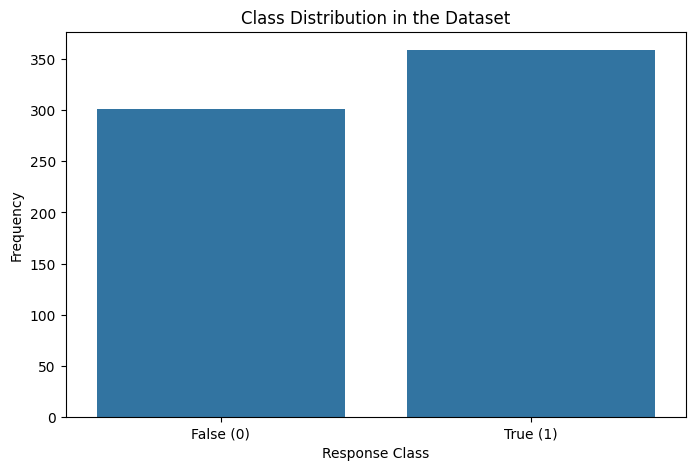

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class in the 'Response' column
class_counts = y.value_counts()

# Plot the class distributions
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution in the Dataset')
plt.xlabel('Response Class')
plt.ylabel('Frequency')
plt.xticks(range(len(class_counts.index)), ['False (0)', 'True (1)'])
plt.show()


Consistent with the predictions, there are more positive treatment elements, need to address that issue.

Time to check coefficients

In [27]:
import numpy as np
from sklearn.linear_model import LogisticRegression

model_data = np.load(
    "../data/training/model_data_stratified_10_percent_test_2024-01-11_12-48-10.npz"
)

X_train = model_data["X_train"]
X_test = model_data["X_test"]
y_train = model_data["y_train"]
y_test = model_data["y_test"]

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

In [31]:
import numpy as np

test = pd.read_csv('../data/training/test_columns_2024-01-11_12-20-45.csv')
assert test.shape == X_train.shape


coefficients = logreg.coef_[0]
odds_ratios = np.exp(coefficients)

feature_names = test.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients, 'Odds Ratio': odds_ratios})

# DataFrame sorted by the absolute magnitude of the coefficients
feature_importance.sort_values('Coefficient', ascending=False)

AssertionError: 

Magnitude of Coefficients: Larger coefficients (in absolute value) indicate a stronger effect on the outcome. Therefore, features with larger absolute coefficients are generally more important.
